In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import utils as ut

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

from tensorflow.keras.layers import Input, Dense, LSTM, Embedding
from tensorflow.keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_colwidth', 1000)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/learn-env/lib/python

In [2]:
yrs_df_3 = pd.read_csv('data/yrs_df').set_index('SEQN')
yrs_df_3


,RIDAGEYR,yrs_osteoarth,yrs_other_arth,yrs_heart_fail,yrs_heart_cond,ever_had_COPD,yrs_emphysema,yrs_chron_bronc,yrs_asthma,yrs_diabetes,yrs_taking_ins,HUQ071
SEQN,,,,,,,,,,,,
93703.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
93704.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
93705.00000,66.00000,0.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
93706.00000,18.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
93707.00000,13.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
102952.00000,70.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
102953.00000,42.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
102954.00000,41.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [3]:
# minority class is just 8.5 %

yrs_df_3['HUQ071'].value_counts(normalize=True)


0.00000   0.91455
1.00000   0.08545
Name: HUQ071, dtype: float64

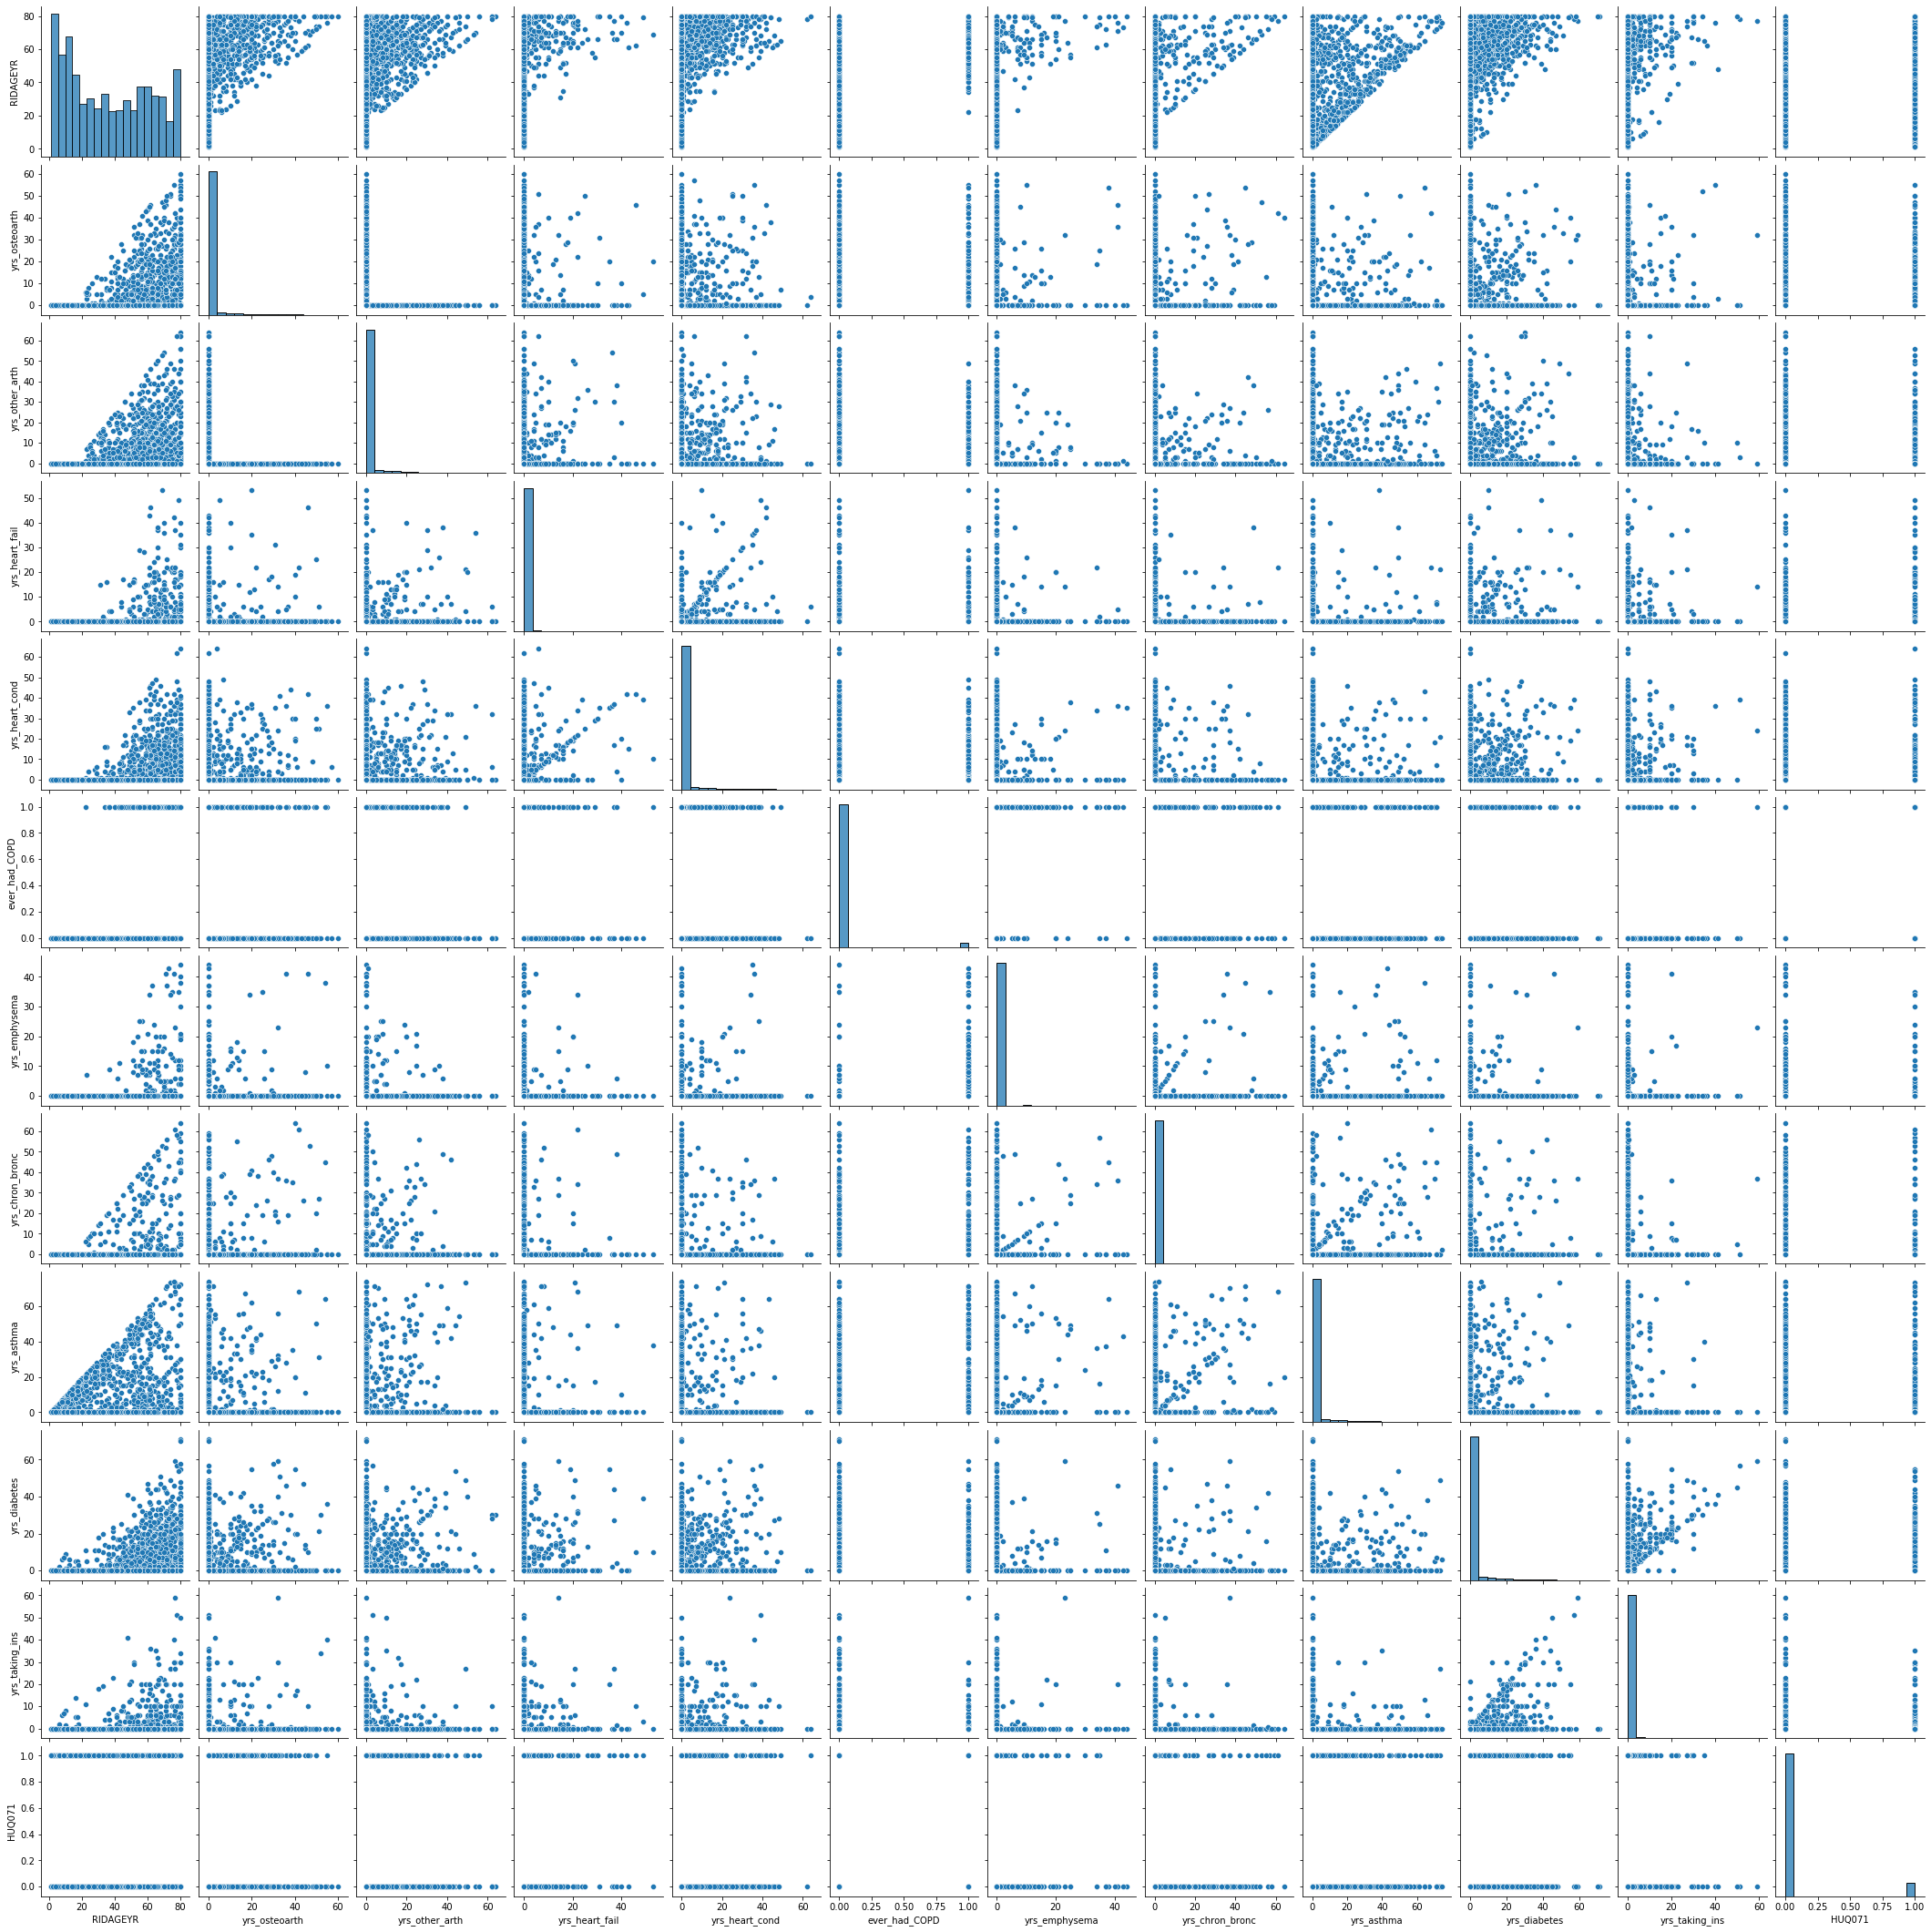

In [4]:
sns.pairplot(yrs_df_3)


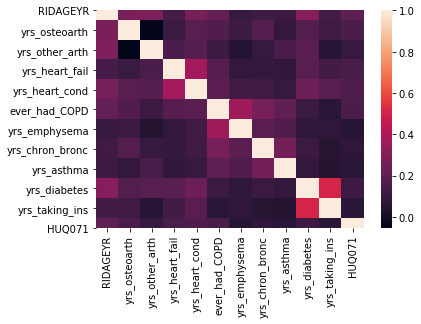

In [5]:
corr = yrs_df_3.corr()
sns.heatmap(corr)

# no strong correlations
# even diabetes and taking insulin is only 50% correlated
# nothing is strongly correlated with hospitalization (HUQ071)

In [6]:
# define X and y

X = yrs_df_3.drop(columns = ['HUQ071'])
y = yrs_df_3['HUQ071']


In [7]:
# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.07, random_state=727)


# look at cross_validate instead of doing by hand

In [8]:
def k_fold_validator(X, y, classifier, cv=5):

    """Uses k-fold cross-validation to calculate the mean recall, precision, and f1 scores 
    for train and test sets for a model.  Also plots a confusion matrix for each test set.
    
    Parameters
    ----------
    
    X : DataFrame, Predictors
    
    y : series, Labels assigned
    
    classifier : An instance of a classifier.
    
    cv : int, How many folds to use when cross-validating.  Default = 5.
    
    Returns
    -------
    
    No objects returned.
    
    Prints mean recall, precision, and f1 scores for train and test sets.
    
    Plots a confusion matrix for each test set."""
    
    kf = KFold(n_splits=cv, random_state=727, shuffle=True)
    clf = classifier

    train_recall_scores = []
    train_precision_scores = []
    train_f1_scores = []
    test_recall_scores = []
    test_precision_scores = []
    test_f1_scores = []
    
    print('Classifier:', clf)
    print('Cross-validation folds:', cv)
    
    print('\n')
    print('Mean ROC-AUC Score:', round(cross_val_score(clf, X, y, scoring='roc_auc').mean(), 3))
    
    
    for train_index, test_index in kf.split(X):

        X_tr, X_test = X.iloc[train_index].astype(str), X.iloc[test_index].astype(str)
        y_tr, y_test = y.iloc[train_index].astype(str), y.iloc[test_index].astype(str)
        
        clf.fit(X_tr, y_tr)

        y_pred_tr = clf.predict(X_tr)
        y_pred_test = clf.predict(X_test)

        train_recall_scores.append(recall_score(y_tr, y_pred_tr, pos_label='1.0'))
        train_precision_scores.append(precision_score(y_tr, y_pred_tr, pos_label='1.0'))
        train_f1_scores.append(f1_score(y_tr, y_pred_tr, pos_label='1.0'))       
        test_recall_scores.append(recall_score(y_test, y_pred_test, pos_label='1.0'))
        test_precision_scores.append(precision_score(y_test, y_pred_test, pos_label='1.0'))
        test_f1_scores.append(f1_score(y_test, y_pred_test, pos_label='1.0'))       
        
        plot_confusion_matrix(clf, X_test, y_test)
        plt.title('Test set')
        
    print('\n')
    
    print('Train mean recall: {} +/- {}'.format(round(pd.Series(train_recall_scores).mean(), 2), 
                                               round(pd.Series(train_recall_scores).std(), 2)))
    
    print('Train mean precision: {} +/- {}'.format(round(pd.Series(train_precision_scores).mean(), 2),
                                                  round(pd.Series(train_precision_scores).std(), 2)))
    
    print('Train mean F1: {} +/- {}'.format(round(pd.Series(train_f1_scores).mean(), 2),
                                           round(pd.Series(train_f1_scores).std(), 2)))
    print('\n')
    
    print('Test mean recall: {} +/- {}'.format(round(pd.Series(test_recall_scores).mean(), 2),
                                               round(pd.Series(test_recall_scores).std(), 2)))
    
    print('Test mean precision: {} +/- {}'.format(round(pd.Series(test_precision_scores).mean(), 2),
                                                  round(pd.Series(test_precision_scores).std(), 2)))
    
    print('Test mean F1: {} +/- {}'.format(round(pd.Series(test_f1_scores).mean(), 2),
                                           round(pd.Series(test_f1_scores).std(), 2)))

In [9]:
def order_features(weights, X_train):
    
    coef_dict = {}

    for n, c in enumerate(X_train.columns):
        coef_dict[c]=round(weights[0][n],4)

    sorted_coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1], reverse=True)}
    df = pd.DataFrame.from_dict(sorted_coef_dict, orient='index', columns=['weight'])
    df['abs_weight']=np.abs(df['weight'])
    weights_df = df.sort_values(by = 'abs_weight', ascending=False)
    
    return weights_df


def order_features_tree(weights, X_train):
    
    coef_dict = {}

    for n, c in enumerate(X_train.columns):
        coef_dict[c]=round(weights[n],4)

    sorted_coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1], reverse=True)}
    df = pd.DataFrame.from_dict(sorted_coef_dict, orient='index', columns=['weight'])
    df['abs_weight']=np.abs(df['weight'])
    weights_df = df.sort_values(by = 'abs_weight', ascending=False)
    
    return weights_df


def k_fold_validator_2(X, y, classifier, cv=5):

    """Uses k-fold cross-validation to calculate the mean recall, precision, and f1 scores 
    for train and test sets for a model.  Also plots a confusion matrix for each test set.
    
    Parameters
    ----------
    
    X : DataFrame, Predictors
    
    y : series, Labels assigned
    
    classifier : An instance of a classifier.
    
    cv : int, How many folds to use when cross-validating.  Default = 5.
    
    Returns
    -------
    
    No objects returned.
    
    Prints mean recall, precision, and f1 scores for train and test sets.
    
    Plots a confusion matrix for each test set."""
    
    scaler = MinMaxScaler()

    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
    
    kf = KFold(n_splits=cv, random_state=727, shuffle=True)
    clf = classifier

    train_recall_scores = []
    train_precision_scores = []
    train_f1_scores = []
    test_recall_scores = []
    test_precision_scores = []
    test_f1_scores = []
    
    print('Classifier:', clf)
    print('Cross-validation folds:', cv)
    
    print('\n')
    print('Mean ROC-AUC Score:', round(cross_val_score(clf, X_scaled, y, scoring='roc_auc').mean(), 3))
    
    
    for train_index, test_index in kf.split(X_scaled):

        X_tr, X_test = X_scaled.iloc[train_index].astype(str), X_scaled.iloc[test_index].astype(str)
        y_tr, y_test = y.iloc[train_index].astype(str), y.iloc[test_index].astype(str)
        
        clf.fit(X_tr, y_tr)

        y_pred_tr = clf.predict(X_tr)
        y_pred_test = clf.predict(X_test)

        train_recall_scores.append(recall_score(y_tr, y_pred_tr, pos_label='1.0'))
        train_precision_scores.append(precision_score(y_tr, y_pred_tr, pos_label='1.0'))
        train_f1_scores.append(f1_score(y_tr, y_pred_tr, pos_label='1.0'))       
        test_recall_scores.append(recall_score(y_test, y_pred_test, pos_label='1.0'))
        test_precision_scores.append(precision_score(y_test, y_pred_test, pos_label='1.0'))
        test_f1_scores.append(f1_score(y_test, y_pred_test, pos_label='1.0'))       
        
        plot_confusion_matrix(clf, X_test, y_test)
        plt.title('Test set')
        
    print('\n')
    
    print('Train mean recall: {} +/- {}'.format(round(pd.Series(train_recall_scores).mean(), 2), 
                                               round(pd.Series(train_recall_scores).std(), 2)))
    
    print('Train mean precision: {} +/- {}'.format(round(pd.Series(train_precision_scores).mean(), 2),
                                                  round(pd.Series(train_precision_scores).std(), 2)))
    
    print('Train mean F1: {} +/- {}'.format(round(pd.Series(train_f1_scores).mean(), 2),
                                           round(pd.Series(train_f1_scores).std(), 2)))
    print('\n')
    
    print('Test mean recall: {} +/- {}'.format(round(pd.Series(test_recall_scores).mean(), 2),
                                               round(pd.Series(test_recall_scores).std(), 2)))
    
    print('Test mean precision: {} +/- {}'.format(round(pd.Series(test_precision_scores).mean(), 2),
                                                  round(pd.Series(test_precision_scores).std(), 2)))
    
    print('Test mean F1: {} +/- {}'.format(round(pd.Series(test_f1_scores).mean(), 2),
                                           round(pd.Series(test_f1_scores).std(), 2)))
    print('\n')
    
    if type(clf) == DecisionTreeClassifier:
        features = order_features_tree(clf.feature_importances_, X_scaled)
    else:
        features = order_features(clf.coef_, X_scaled)
    
    print('Feature weights:', '\n', features, '\n')
    
    print('Confusion matrices for each fold test set:', '\n')
    

Classifier: LogisticRegression(max_iter=10000)
Cross-validation folds: 5


Mean ROC-AUC Score: 0.724


Train mean recall: 0.03 +/- 0.0
Train mean precision: 0.57 +/- 0.02
Train mean F1: 0.06 +/- 0.01


Test mean recall: 0.03 +/- 0.01
Test mean precision: 0.53 +/- 0.14
Test mean F1: 0.05 +/- 0.01


Feature weights: 
                   weight  abs_weight
RIDAGEYR         1.68310     1.68310
yrs_heart_fail   1.54970     1.54970
yrs_osteoarth    1.48000     1.48000
yrs_heart_cond   1.10620     1.10620
yrs_diabetes     0.72500     0.72500
ever_had_COPD    0.70870     0.70870
yrs_other_arth   0.59230     0.59230
yrs_asthma       0.49240     0.49240
yrs_emphysema   -0.23740     0.23740
yrs_chron_bronc -0.19580     0.19580
yrs_taking_ins  -0.09870     0.09870 

Confusion matrices for each fold test set: 



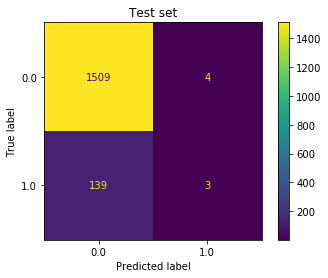

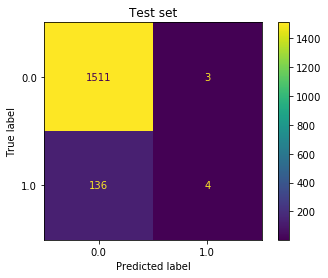

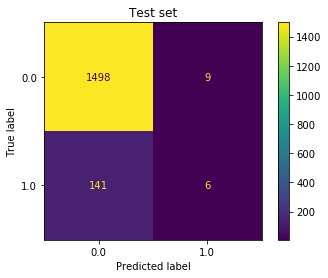

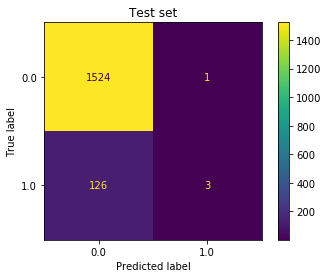

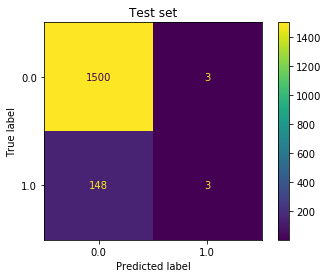

In [10]:
k_fold_validator_2(X=X_training, y=y_training, classifier=LogisticRegression(max_iter=10000), cv=5)


Classifier: ComplementNB()
Cross-validation folds: 5


Mean ROC-AUC Score: 0.552


Train mean recall: 0.3 +/- 0.01
Train mean precision: 0.28 +/- 0.01
Train mean F1: 0.29 +/- 0.01


Test mean recall: 0.3 +/- 0.02
Test mean precision: 0.28 +/- 0.04
Test mean F1: 0.29 +/- 0.03


Feature weights: 
                  weight  abs_weight
yrs_emphysema   5.38620     5.38620
yrs_heart_fail  5.17450     5.17450
yrs_taking_ins  4.89910     4.89910
yrs_chron_bronc 4.71180     4.71180
yrs_heart_cond  3.93220     3.93220
yrs_osteoarth   3.57520     3.57520
yrs_diabetes    3.52420     3.52420
yrs_other_arth  3.46410     3.46410
yrs_asthma      3.27460     3.27460
ever_had_COPD   3.05620     3.05620
RIDAGEYR        0.24840     0.24840 

Confusion matrices for each fold test set: 



/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


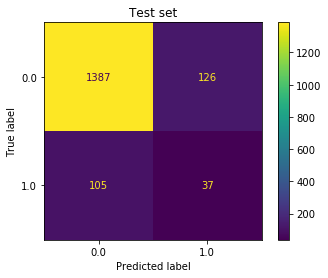

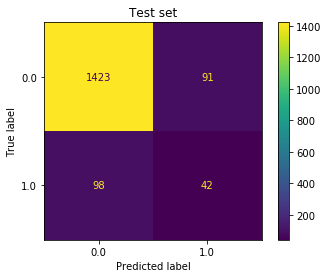

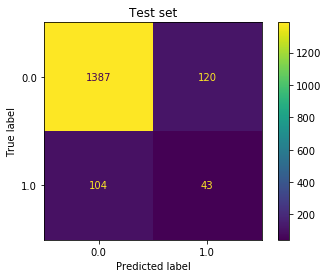

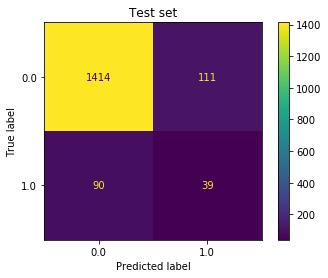

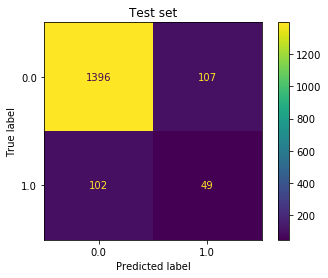

In [11]:
# try a complement Naive Bayes

CompNB = ComplementNB()

k_fold_validator_2(X_training, y_training, CompNB)

Classifier: DecisionTreeClassifier(max_depth=6, min_samples_split=15)
Cross-validation folds: 5


Mean ROC-AUC Score: 0.709


Train mean recall: 0.13 +/- 0.03
Train mean precision: 0.76 +/- 0.04
Train mean F1: 0.21 +/- 0.04


Test mean recall: 0.05 +/- 0.03
Test mean precision: 0.34 +/- 0.16
Test mean F1: 0.09 +/- 0.05


Feature weights: 
                  weight  abs_weight
yrs_heart_cond  0.31490     0.31490
RIDAGEYR        0.22150     0.22150
yrs_heart_fail  0.12500     0.12500
yrs_osteoarth   0.11810     0.11810
yrs_diabetes    0.06610     0.06610
ever_had_COPD   0.04090     0.04090
yrs_emphysema   0.04020     0.04020
yrs_taking_ins  0.02790     0.02790
yrs_other_arth  0.02710     0.02710
yrs_asthma      0.00940     0.00940
yrs_chron_bronc 0.00910     0.00910 

Confusion matrices for each fold test set: 



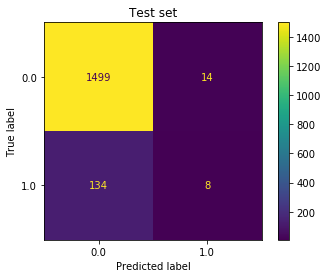

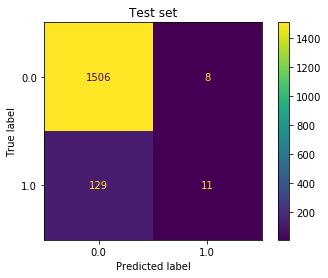

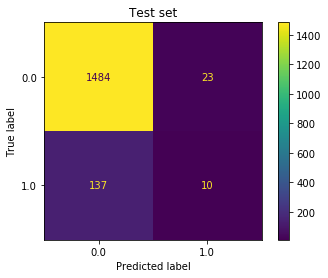

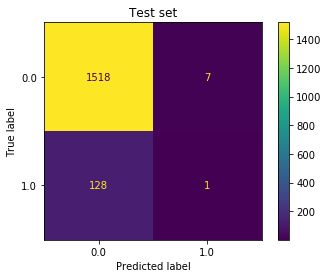

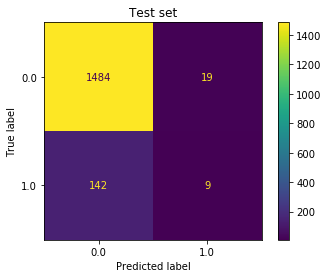

In [12]:
# try a decision tree

tree = DecisionTreeClassifier(max_depth=6, min_samples_split=15)

k_fold_validator_2(X_training, y_training, tree)

In [13]:
# other features to try:
# cancer
# lang spoken at home
# depression
# alcohol-related disorders
# childbirth - exclude 70 ppl who had babies in the past 12 months? RHQ197 - How many months ago have baby?
# sickle cell
# language

# other things to try:
# svm
# neural net

In [14]:
binary_df_2 = pd.read_csv('data/binary_df').set_index('SEQN')

In [15]:
# minority class is just 8.5 %

binary_df_2['HUQ071'].value_counts(normalize=True)

0.00000   0.91455
1.00000   0.08545
Name: HUQ071, dtype: float64

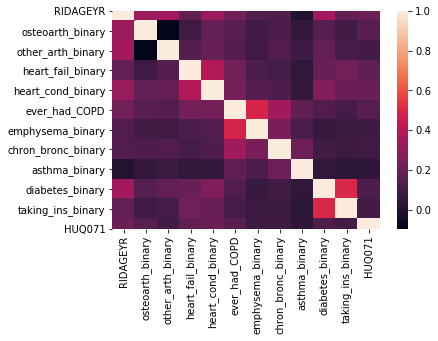

In [16]:
corr = binary_df_2.corr()
sns.heatmap(corr)

# no strong correlations
# even diabetes and taking insulin is only 50% correlated
# nothing is strongly correlated with hospitalization (HUQ071)

In [17]:
# define X and y

X = binary_df_2.drop(columns = 'HUQ071')
y = binary_df_2['HUQ071']

In [18]:
# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.07, random_state=727)

Classifier: ComplementNB()
Cross-validation folds: 5


Mean ROC-AUC Score: 0.598


Train mean recall: 0.42 +/- 0.02
Train mean precision: 0.25 +/- 0.01
Train mean F1: 0.32 +/- 0.01


Test mean recall: 0.41 +/- 0.05
Test mean precision: 0.25 +/- 0.04
Test mean F1: 0.31 +/- 0.04


Feature weights: 
                     weight  abs_weight
emphysema_binary   4.62770     4.62770
heart_fail_binary  4.14820     4.14820
chron_bronc_binary 4.07920     4.07920
taking_ins_binary  3.60920     3.60920
ever_had_COPD      3.54860     3.54860
heart_cond_binary  2.83280     2.83280
osteoarth_binary   2.61540     2.61540
diabetes_binary    2.35440     2.35440
asthma_binary      2.33480     2.33480
other_arth_binary  2.29110     2.29110
RIDAGEYR           0.74080     0.74080 

Confusion matrices for each fold test set: 



/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


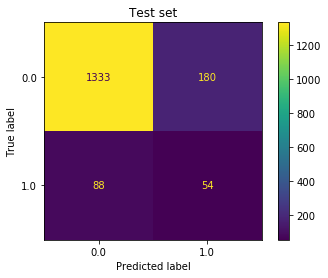

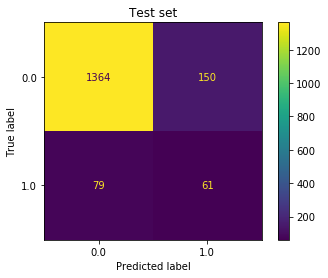

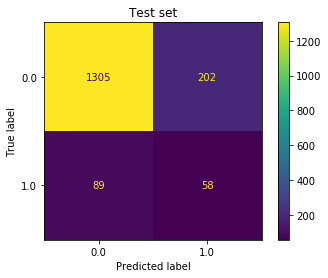

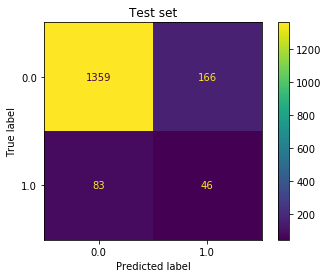

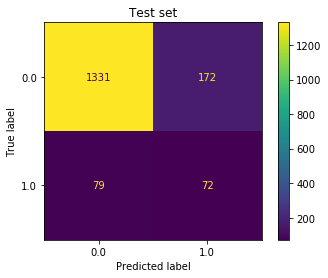

In [19]:
# try a complement naive Bayes

CompNB = ComplementNB()

k_fold_validator_2(X_training, y_training, CompNB)

Classifier: LogisticRegression()
Cross-validation folds: 5


Mean ROC-AUC Score: 0.733


Train mean recall: 0.05 +/- 0.01
Train mean precision: 0.51 +/- 0.05
Train mean F1: 0.09 +/- 0.02


Test mean recall: 0.05 +/- 0.01
Test mean precision: 0.59 +/- 0.25
Test mean F1: 0.09 +/- 0.02


Feature weights: 
                      weight  abs_weight
RIDAGEYR            1.42040     1.42040
heart_fail_binary   0.76090     0.76090
osteoarth_binary    0.70660     0.70660
heart_cond_binary   0.58590     0.58590
ever_had_COPD       0.52060     0.52060
asthma_binary       0.29910     0.29910
other_arth_binary   0.27020     0.27020
diabetes_binary     0.15190     0.15190
taking_ins_binary   0.06230     0.06230
emphysema_binary   -0.04110     0.04110
chron_bronc_binary  0.00940     0.00940 

Confusion matrices for each fold test set: 



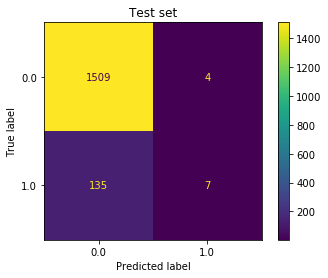

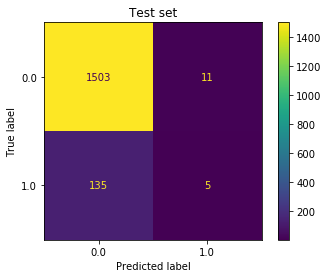

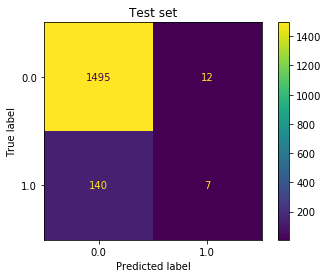

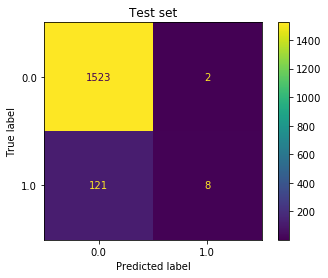

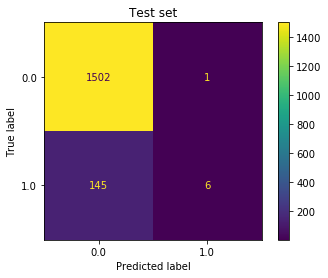

In [20]:
# try a Logistic Regression

logreg = LogisticRegression()

k_fold_validator_2(X_training, y_training, logreg)

Classifier: DecisionTreeClassifier(max_depth=6, min_samples_split=15)
Cross-validation folds: 5


Mean ROC-AUC Score: 0.706


Train mean recall: 0.08 +/- 0.01
Train mean precision: 0.76 +/- 0.04
Train mean F1: 0.14 +/- 0.02


Test mean recall: 0.03 +/- 0.01
Test mean precision: 0.3 +/- 0.15
Test mean F1: 0.05 +/- 0.02


Feature weights: 
                     weight  abs_weight
RIDAGEYR           0.44700     0.44700
heart_cond_binary  0.27740     0.27740
heart_fail_binary  0.06570     0.06570
ever_had_COPD      0.05610     0.05610
osteoarth_binary   0.04800     0.04800
diabetes_binary    0.04390     0.04390
taking_ins_binary  0.03690     0.03690
other_arth_binary  0.01500     0.01500
chron_bronc_binary 0.00690     0.00690
asthma_binary      0.00310     0.00310
emphysema_binary   0.00000     0.00000 

Confusion matrices for each fold test set: 



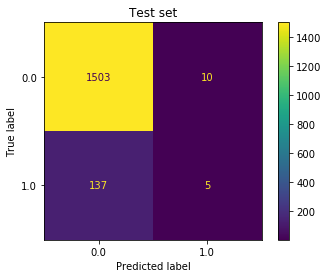

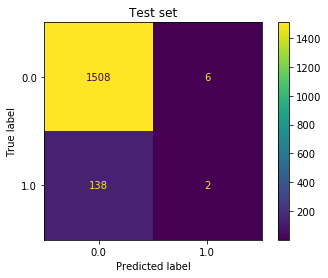

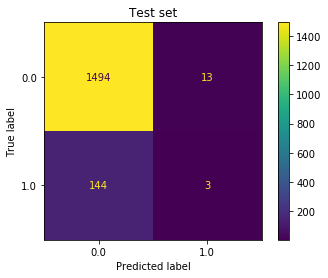

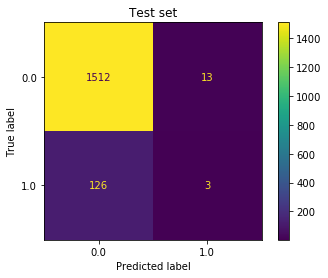

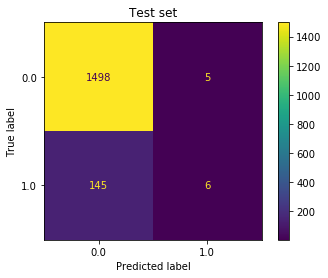

In [21]:
# try a decision tree

tree = DecisionTreeClassifier(max_depth=6, min_samples_split=15)

k_fold_validator_2(X_training, y_training, tree)

In [24]:
# add race

binary_df_3 = pd.read_csv('data/binary_df_3').set_index('SEQN')
binary_df_3.head(200)

,RIDAGEYR,osteoarth_binary,other_arth_binary,heart_fail_binary,heart_cond_binary,ever_had_COPD,emphysema_binary,chron_bronc_binary,asthma_binary,diabetes_binary,taking_ins_binary,HUQ071,RIDRETH3_1.0,RIDRETH3_2.0,RIDRETH3_3.0,RIDRETH3_4.0,RIDRETH3_6.0
SEQN,,,,,,,,,,,,,,,,,
93703.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0,0,0,1
93704.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0,1,0,0
93705.00000,66.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0,0,1,0
93706.00000,18.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0,0,0,1
93707.00000,13.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0,0,0,0
93708.00000,66.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0,0,0,1
93709.00000,75.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0,0,1,0
93711.00000,56.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0,0,0,1
93712.00000,18.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1,0,0,0,0


In [25]:
# define X and y

X = binary_df_3.drop(columns = 'HUQ071')
y = binary_df_3['HUQ071']

# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.07, random_state=727)


Classifier: ComplementNB()
Cross-validation folds: 5


Mean ROC-AUC Score: 0.694


Train mean recall: 0.49 +/- 0.01
Train mean precision: 0.23 +/- 0.01
Train mean F1: 0.31 +/- 0.01


Test mean recall: 0.49 +/- 0.05
Test mean precision: 0.23 +/- 0.03
Test mean F1: 0.31 +/- 0.03


Feature weights: 
                     weight  abs_weight
emphysema_binary   5.35130     5.35130
heart_fail_binary  4.87170     4.87170
chron_bronc_binary 4.80270     4.80270
taking_ins_binary  4.33270     4.33270
ever_had_COPD      4.27210     4.27210
heart_cond_binary  3.55630     3.55630
osteoarth_binary   3.33900     3.33900
diabetes_binary    3.07800     3.07800
asthma_binary      3.05840     3.05840
RIDRETH3_2.0       3.02400     3.02400
other_arth_binary  3.01470     3.01470
RIDRETH3_6.0       2.60300     2.60300
RIDRETH3_1.0       2.47060     2.47060
RIDRETH3_4.0       2.05690     2.05690
RIDRETH3_3.0       1.71520     1.71520
RIDAGEYR           1.46430     1.46430 

Confusion matrices for each fold tes

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


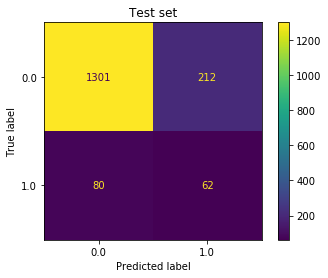

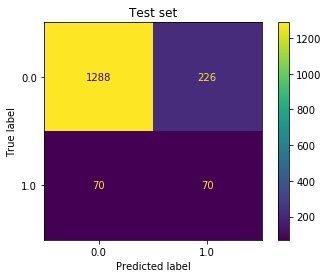

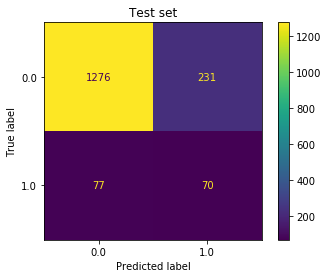

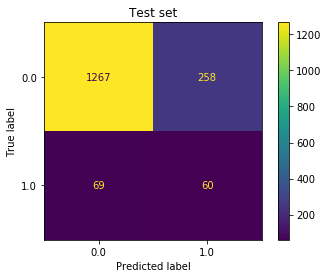

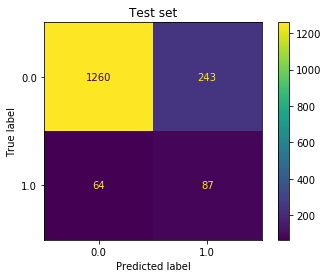

In [26]:
CompNB = ComplementNB()

k_fold_validator_2(X_training, y_training, CompNB)

In [32]:
binary_df_4 = pd.read_csv('data/binary_df_4').set_index('SEQN')
binary_df_4.head(200)

,RIDAGEYR,osteoarth_binary,other_arth_binary,heart_fail_binary,heart_cond_binary,ever_had_COPD,emphysema_binary,chron_bronc_binary,asthma_binary,diabetes_binary,taking_ins_binary,HUQ071,RIDRETH3_1.0,RIDRETH3_2.0,RIDRETH3_3.0,RIDRETH3_4.0,RIDRETH3_6.0,num_rx
SEQN,,,,,,,,,,,,,,,,,,
93703.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0,0,0,1,0.00000
93704.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0,1,0,0,0.00000
93705.00000,66.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0,0,1,0,2.00000
93706.00000,18.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0,0,0,1,0.00000
93707.00000,13.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0,0,0,0,0.00000
93708.00000,66.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0,0,0,1,3.00000
93709.00000,75.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0,0,1,0,4.00000
93711.00000,56.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0,0,0,1,0.00000
93712.00000,18.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1,0,0,0,0,0.00000


In [33]:
# define X and y

X = binary_df_4.drop(columns = ['HUQ071'])
y = binary_df_4['HUQ071']

# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.07, random_state=727)



Classifier: ComplementNB()
Cross-validation folds: 5


Mean ROC-AUC Score: 0.706


Train mean recall: 0.5 +/- 0.01
Train mean precision: 0.23 +/- 0.01
Train mean F1: 0.31 +/- 0.01


Test mean recall: 0.5 +/- 0.04
Test mean precision: 0.22 +/- 0.03
Test mean F1: 0.31 +/- 0.03


Feature weights: 
                     weight  abs_weight
emphysema_binary   5.38190     5.38190
heart_fail_binary  4.90230     4.90230
chron_bronc_binary 4.83330     4.83330
taking_ins_binary  4.36330     4.36330
ever_had_COPD      4.30270     4.30270
heart_cond_binary  3.58690     3.58690
num_rx             3.50140     3.50140
osteoarth_binary   3.36960     3.36960
diabetes_binary    3.10860     3.10860
asthma_binary      3.08900     3.08900
RIDRETH3_2.0       3.05460     3.05460
other_arth_binary  3.04530     3.04530
RIDRETH3_6.0       2.63360     2.63360
RIDRETH3_1.0       2.50120     2.50120
RIDRETH3_4.0       2.08750     2.08750
RIDRETH3_3.0       1.74580     1.74580
RIDAGEYR           1.49490     1.49490 


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


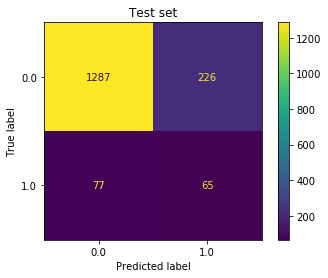

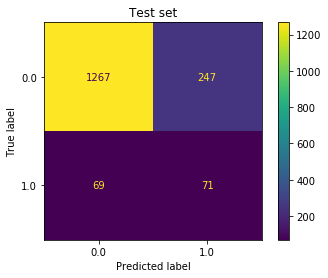

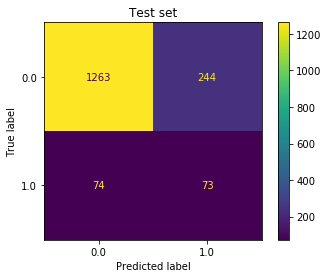

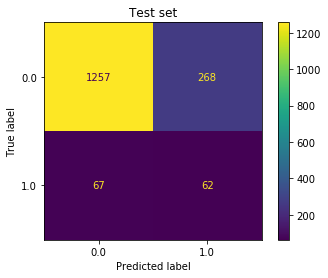

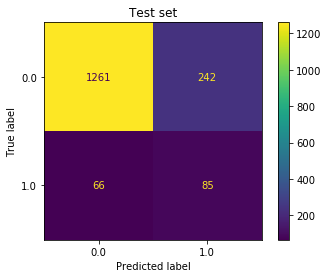

In [34]:
# try Complement Naive Bayes

CompNB = ComplementNB()

k_fold_validator_2(X_training, y_training, CompNB)

Classifier: ComplementNB()
Cross-validation folds: 5


Mean ROC-AUC Score: 0.707


Train mean recall: 0.55 +/- 0.01
Train mean precision: 0.2 +/- 0.01
Train mean F1: 0.29 +/- 0.01


Test mean recall: 0.55 +/- 0.05
Test mean precision: 0.2 +/- 0.02
Test mean F1: 0.29 +/- 0.03


Feature weights: 
                     weight  abs_weight
emphysema_binary   4.87310     4.87310
heart_fail_binary  4.39360     4.39360
chron_bronc_binary 4.32460     4.32460
taking_ins_binary  3.85460     3.85460
ever_had_COPD      3.79390     3.79390
heart_cond_binary  3.07820     3.07820
num_rx             2.99260     2.99260
osteoarth_binary   2.86080     2.86080
diabetes_binary    2.59980     2.59980
asthma_binary      2.58020     2.58020
RIDRETH3_2.0       2.54590     2.54590
other_arth_binary  2.53650     2.53650
RIDRETH3_6.0       2.12490     2.12490
RIDRETH3_1.0       1.99240     1.99240
RIDRETH3_4.0       1.57870     1.57870 

Confusion matrices for each fold test set: 



/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


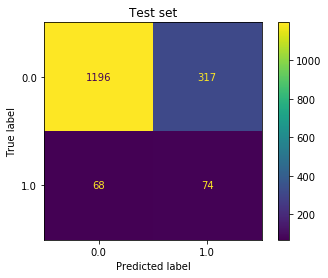

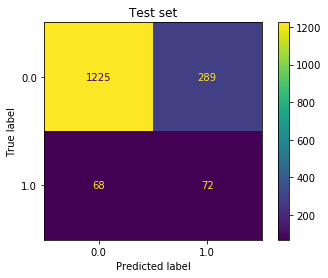

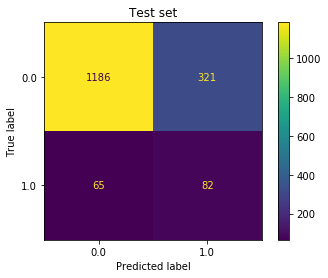

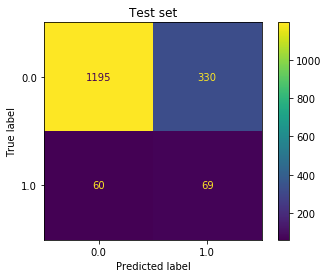

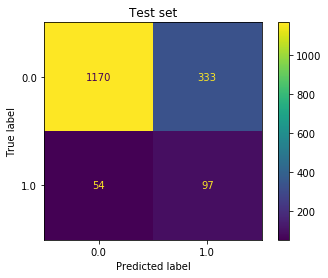

In [36]:
# drop features with lowest weights

# define X and y

X = binary_df_4.drop(columns = ['HUQ071','RIDRETH3_3.0','RIDAGEYR'])
y = binary_df_4['HUQ071']

# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.07, random_state=727)

k_fold_validator_2(X_training, y_training, CompNB)

In [ ]:
# get patients whose primary diagnosis for at least one drug is unknown

unknown_rx_dx = rxq_rx_j.loc[rxq_rx_j['RXDRSC1'].isin(['99999', '55555'])]
unknown_rx_dx

In [ ]:
unk_rx_dx_unique_pts = unknown_rx_dx['SEQN'].unique()
len(unk_rx_dx_unique_pts)

In [ ]:
unk_rx_dx_unique_pts = pd.DataFrame(unk_rx_dx_unique_pts)
unk_rx_dx_unique_pts['unknown_dx'] = 1
unk_rx_dx_unique_pts.rename(columns = {0: 'SEQN'}, inplace=True)
unk_rx_dx_unique_pts

In [ ]:
binary_df_5 = binary_df_4.merge(unk_rx_dx_unique_pts, how='left', on='SEQN').fillna(0)
binary_df_5.drop(columns='rx_one_year_plus', inplace=True)
binary_df_5.set_index('SEQN', inplace=True)
binary_df_5

In [ ]:
# define X and y

X = binary_df_5.drop(columns = ['HUQ071'])
y = binary_df_5['HUQ071']

# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.07, random_state=727)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_training)
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_training.index, columns=X_training.columns)

CompNB = ComplementNB()

CompNB.fit(X_train_scaled, y_training)

k_fold_validator(X_train_scaled, y_training, CompNB)

order_features(CompNB.coef_, X_train_scaled)



In [ ]:
age_to_plot = binary_df_5[['RIDAGEYR','HUQ071']]
age_to_plot

In [ ]:
sns.catplot(x="HUQ071", y="RIDAGEYR", data=binary_df_5, kind='box')

In [ ]:
sns.catplot(x="HUQ071", y="RIDAGEYR", data=binary_df_5, kind='swarm')

In [ ]:
corr = binary_df_5.corr()
sns.heatmap(corr)

# no strong correlations
# even diabetes and taking insulin is only 50% correlated
# nothing is strongly correlated with hospitalization (HUQ071)

In [ ]:
# engineer age
age

In [ ]:
age['agemap'] = age['RIDAGEYR'].map(lambda x: '0-5' if x < 5
                                    else '6-17' if x < 17
                                   else '18-49' if x < 50
                                    else '50-59' if x < 60
                                    else '60-69' if x < 70
                                   else '70+')

In [ ]:
age

In [ ]:
age_buckets = pd.get_dummies(age['agemap'])
age_buckets

In [ ]:
age_2 = age.join(age_buckets).drop(columns = ['6-17'])
age_2

In [ ]:
# childbirth - exclude 70 ppl who had babies in the past 12 months? RHQ197 - How many months ago have baby?

babies_this_year = rhq_j[['SEQN', 'RHQ197']]
babies_this_year = babies_this_year.loc[~babies_this_year['RHQ197'].isna()]
babies_this_year

In [ ]:
# join target
babies_target = babies_this_year.merge(target, how='left', on='SEQN')
babies_target

# most people who had babies within past 12 months are marked as 1 - had a hospital stay
# not all are, possibly due to differences in how ppl responded to the question?

In [ ]:
# how many in this group were hospitalized?

babies_target['HUQ071'].sum()

In [ ]:
babies_target_2 = babies_target.merge(huq_j[['SEQN', 'HUD080']], how='left', on='SEQN')
babies_target_2.fillna(0, inplace=True)

# some ppl who delivered babies were in the hospital more than once

babies_target_2['non_birth_hosp'] = babies_target_2['HUD080']
babies_target_2

In [ ]:
# remove one hospitalization from the count for child birth

babies_target_3 = babies_target_2.copy()
babies_target_3.loc[(babies_target_3['RHQ197'] <= 12) &
                    (babies_target_3['HUQ071'] != 0), 
                    'non_birth_hosp'] = babies_target_3['HUD080'] - 1
babies_target_3

In [ ]:
babies_target_3['non_birth_hosp_binary'] = np.where(babies_target_3['non_birth_hosp'] > 0, 1, 0)
babies_target_3

In [ ]:
# how many in this group were hospitalized?
babies_target_3['non_birth_hosp_binary'].sum()

In [ ]:
babies_target_final = babies_target_3[['SEQN', 'non_birth_hosp_binary']]
babies_target_final

In [ ]:
binary_df_6 = binary_df_5.merge(babies_target_final, how='left', on='SEQN')
binary_df_6

In [ ]:
binary_df_6['updated_hosp'] = np.where(~binary_df_6['non_birth_hosp_binary'].isnull(), 
                                      binary_df_6['non_birth_hosp_binary'],
                                      binary_df_6['HUQ071'])

In [ ]:
print(
     binary_df_6['HUQ071'].sum(),
     binary_df_6['updated_hosp'].sum())

In [ ]:
binary_df_7 = binary_df_6.drop(columns = ['HUQ071','non_birth_hosp_binary'])
binary_df_7.set_index('SEQN', inplace=True)

In [ ]:
X = binary_df_7.drop(columns = ['updated_hosp'])
y = binary_df_7['updated_hosp']

# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.07, random_state=727)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_training)
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_training.index, columns=X_training.columns)

CompNB = ComplementNB()

CompNB.fit(X_train_scaled, y_training)

k_fold_validator(X_train_scaled, y_training, CompNB)

order_features(CompNB.coef_, X_train_scaled)

# nice!!!


In [ ]:
sns.catplot(x="updated_hosp", y="RIDAGEYR", data=binary_df_7, kind='swarm')

In [ ]:
sns.catplot(x="updated_hosp", y="RIDAGEYR", data=binary_df_7, kind='box')

In [ ]:
age_3 = age_2.drop(columns = ['RIDAGEYR', 'agemap'])
age_3

In [ ]:
binary_df_8 = binary_df_7.merge(age_3, how='left', on='SEQN').drop(columns = 'RIDAGEYR')
binary_df_8.set_index('SEQN', inplace=True)
binary_df_8

In [ ]:
X = binary_df_8.drop(columns = ['updated_hosp'])
y = binary_df_8['updated_hosp']

# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.07, random_state=727)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_training)
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_training.index, columns=X_training.columns)

CompNB = ComplementNB()

CompNB.fit(X_train_scaled, y_training)

k_fold_validator(X_train_scaled, y_training, CompNB)

order_features(CompNB.coef_, X_train_scaled)

In [ ]:
mcq_j

In [ ]:
liver = mcq_j[['SEQN',
       'MCQ170L', # do you still have a liver condition
       'MCD180L']] #  Age when told you had a liver condition

liver


In [ ]:
liver['MCQ170L'].value_counts()

# 1 - yes
# 2 - no
# 9 - don't know


In [ ]:
liver['MCD180L'].value_counts()

# need to remove 99999.00000

In [ ]:
liver['MCD180L'] = ut.replace_with_median(liver['MCD180L'], 99999.00000)
liver['MCD180L'].value_counts()

In [ ]:
liver_2 = liver.merge(age, how='left', on='SEQN')
liver_2

In [ ]:
liver_2['yrs_with_liver'] = liver_2['RIDAGEYR'] - liver_2['MCD180L']
liver_2['liver_binary'] = np.where(liver_2['yrs_with_liver'] > 0, 1, 0)
liver_2['liver_binary'] = np.where(liver_2['MCQ170L'] == 1, liver_2['liver_binary'], 0)
liver_2.head(200)

In [ ]:
liver_3 = liver_2[['SEQN', 'liver_binary']]
liver_3['liver_binary']

In [ ]:
binary_df_9 = binary_df_8.merge(liver_3, how='left', on='SEQN').set_index('SEQN')
binary_df_9

In [ ]:
# define X and y

X = binary_df_9.drop(columns = ['updated_hosp'])
y = binary_df_9['updated_hosp']

# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.07, random_state=727)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_training)
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_training.index, columns=X_training.columns)

CompNB = ComplementNB()

CompNB.fit(X_train_scaled, y_training)

k_fold_validator(X_train_scaled, y_training, CompNB)

order_features(CompNB.coef_, X_train_scaled)

# no improvement

In [ ]:
knn = KNeighborsClassifier()

knn.fit(X_train_scaled, y_training)

k_fold_validator(X_train_scaled, y_training, knn)

# order_features(CompNB.coef_, X_train_scaled)

In [ ]:
nn = Sequential()

# Input layer with dropout
nn.add(layers.Dropout(0.3))

# First hidden layer
nn.add(layers.Dense(10, activation='relu'))
nn.add(layers.Dropout(0.3))

# Second hidden layer
nn.add(layers.Dense(10, activation='relu'))
nn.add(layers.Dropout(0.3))

# Third hidden layer
nn.add(layers.Dense(10, activation='relu'))
nn.add(layers.Dropout(0.3))

# Output layer
nn.add(layers.Dense(1, activation='linear'))

# Compile the model
nn.compile(optimizer='SGD', 
              loss='mse',  
              metrics=['accuracy']) 

# Return the compiled model


In [ ]:
y_training_array = y_training.to_numpy().reshape((8271,1))

In [ ]:
type(y_training_array)

In [ ]:
y_training_array.shape

In [ ]:
type(y_training_array[0][0])

In [ ]:
# !pip install -U tensorflow==2.4.1
# !pip install Keras==2.2.4



In [ ]:
X_train_scaled_reindex = X_train_scaled.reset_index(drop=True)
X_train_scaled_reindex

In [ ]:
# always predicting majority class

nn.fit(X_train_scaled_reindex, y_training_array, epochs=10, validation_split=0.1)